# Modely dravce a kořisti


```{index} single: Model ; dravce a kořisti
```

Jako modely dravce a kořisti se nazývají modely zpravidla dvou populací, kdy jedna z populací (kořist) se přirozeně rozmnožuje a rychlost jejího růstu je zpomalována působením predátora, zatímco druhá z populací (predátor) má bez přítomnosti kořisti negativní rychlost růstu a může růst pouze v přítomnosti dostatečného množsví kořisti. 

Více o ekologickém pozadí těchto modelů viz {cite}`begon` kapitola 10.


## Lotkův a Volterrův model 

Lotkův Volterrův model jsme poznali v úvodní kapitole k autonomním systémům.
Tento model předpokládá rychlost růstu úměrnou velikosti populace kořisti (není tedy zahrnuta nosná kapacita prostředí a s ní související vnitrodruhová konkurence) a
tato rychlost je snižována přítomností dravce rychlostí úměrnou velikosti
populace dravce i kořisti. O populaci dravce se v tomto modelu předpokládá, že bez potravy vymírá rychlostí úměrnou
velikosti této populace a kladný člen vyjadřující růst populace v přítomnosti kořisti je úměrný
velikostem obou populací, tj. velikosti populace dravce i kořisti. Přestože model přirozeně ignoruje nosnou kapacitu prostředí, nemusí tato skutečnost model diskvalifikovat z aplikací,
protože samotná přítomnost predátora může způsobit, že populace kořisti je
trvale dostatečně pod nosnou kapacitou a mezidruhová konkurence v populaci
kořisti nemá příliš velký vliv. 

Jsou-li $x$ a $y$ velikosti populací kořisti a dravce, má matematický model tvar
$$
\begin{aligned}\frac{\mathrm dx}{\mathrm dt}&=ax-bxy,\\\frac{\mathrm dy}{\mathrm dt}&=-cy+dxy.\end{aligned}
$$

Řešením tohoto modelu jsou periodické trajektorie. Ve cvičení prozkoumáme, zda mají všechny trajektorie stejnou periodu, či nikoliv.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp

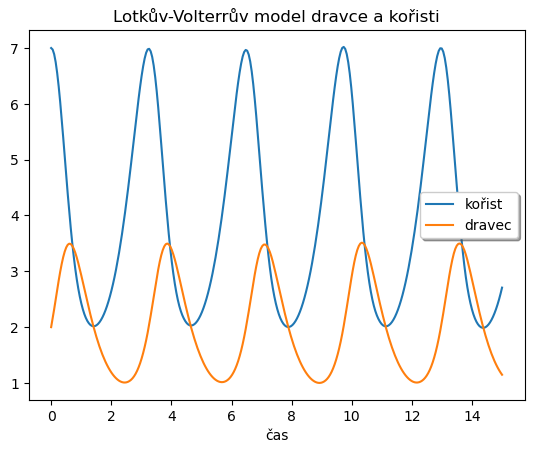

In [2]:
def prey(x,y,a=2,b=1):
    return a*x - b*x*y

def predator(x,y,c=2,d=0.5):
    return -c*y+d*x*y

def model(t,X):
    x,y = X
    return [prey(x,y),predator(x,y)]

meze = [0,15]
pocatecni_podminka = [7, 2]


t = np.linspace(*meze, 300)
sol = solve_ivp(
    model, 
    meze, # interval pro reseni
    pocatecni_podminka, # pocatecni podminka
    t_eval=t
)

plt.plot(t, sol.y.T)
plt.xlabel('čas')
plt.legend(['kořist', 'dravec'], shadow=True)
plt.title('Lotkův-Volterrův model dravce a kořisti')
plt.show()

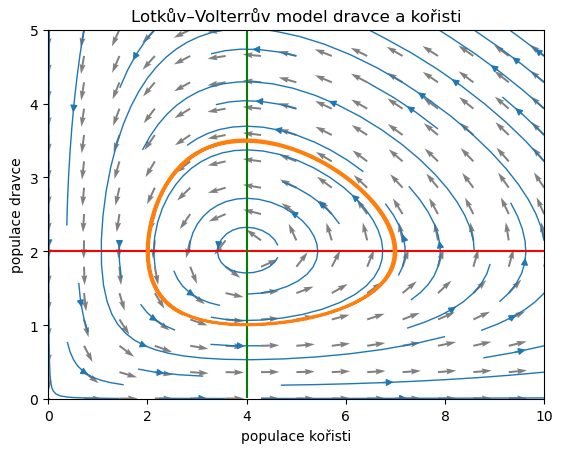

In [3]:
x, y = np.meshgrid(np.linspace(0.01, 10, 15), 
                   np.linspace(0.01, 5, 15))

# Komponenty vektoroveho pole
u,v = model(0,[x,y])
M = np.sqrt(u**2+v**2) # velikost vektoru

fig,ax = plt.subplots()
ax.quiver(x,y,u/M,v/M,color='gray',units='xy', angles='xy') # vykresleni s jednotkovou delkou
integralni_krivky = ax.streamplot(x, y, u, v, density=0.5, linewidth=1)

t = np.linspace(*meze,800)
reseni = solve_ivp(model,
                   meze,
                   pocatecni_podminka,
                   t_eval = t
                  )

x_nulcline = plt.contour(x, y, prey(x,y), [0], colors='red')
y_nulcline = plt.contour(x, y, predator(x,y), [0], colors='green')

ax.plot(*reseni.y)
ax.set(
    ylim=(0,None), 
    xlim=(0,None),
xlabel="populace kořisti",
ylabel="populace dravce",
title="Lotkův–Volterrův model dravce a kořisti");

## Rosenzweigův a MacArthurův model

Obecněji je možné předpokládat růst populace kořisti závislý na hustotě
populace a nelineární trofickou funkci predátora. Toto vede na model 
$$
\begin{aligned}\frac{\mathrm dx}{\mathrm dt}&=x\phi(x)-yf(x,y),\\\frac{\mathrm
dy}{\mathrm dt}&=-cy+dyf(x,y),\end{aligned}
$$
jehož řešení mohou vypadat například následovně.

In [4]:
def predator(x,y,c=0.04, d=0.1, m=4):
    return -c*y + d*x*y/(m+x)

def prey(x,y,r=1, b=0.3, K=10, m=4):
    return r*(1-x/K)*x-b*x*y/(m+x)

def model(t,X):
    x,y = X
    return [prey(x,y),predator(x,y)]

meze = [0,400]
t = np.linspace(*meze,2000)
pocatecni_podminky = [[2,12],[4,16],[2.5,16]]

populace = ["kořist","dravec"]
df = pd.DataFrame(
    columns = pd.MultiIndex.from_product(
        [
            [i for i in range(len(pocatecni_podminky))],
            populace
        ], names = ['počáteční podmínka', 'populace'])
)

for i,pocatecni_podminka in enumerate(pocatecni_podminky):
    reseni = solve_ivp(model,
                   meze,
                   pocatecni_podminka,
                   t_eval = t
                  ).y.T
    df[[(i,j) for j in populace]] = reseni
df

počáteční podmínka         0                    1                    2  \
populace              kořist     dravec    kořist     dravec    kořist   
0                   2.000000  12.000000  4.000000  16.000000  2.500000   
1                   2.081806  11.985075  3.999522  16.032045  2.505855   
2                   2.167149  11.972333  3.998101  16.064135  2.511873   
3                   2.256029  11.961797  3.995754  16.096251  2.518052   
4                   2.348415  11.953486  3.992499  16.128375  2.524389   
...                      ...        ...       ...        ...       ...   
1995                3.346472  17.636679  1.248762  14.006835  1.082455   
1996                3.310200  17.655847  1.267999  13.961871  1.077136   
1997                3.273730  17.674061  1.288441  13.917847  1.072496   
1998                3.237050  17.691302  1.310128  13.874797  1.068537   
1999                3.200145  17.707555  1.333098  13.832754  1.065264   

počáteční podmínka             
populace               dravec  
0                   16.000000  
1                   15.995163  
2                   15.990508  
3                   15.986038  
4                   15.981757  
...                       ...  
1995                15.550477  
1996                15.492260  
1997                15.434021  
1998                15.375796  
1999                15.317619  

[2000 rows x 6 columns]

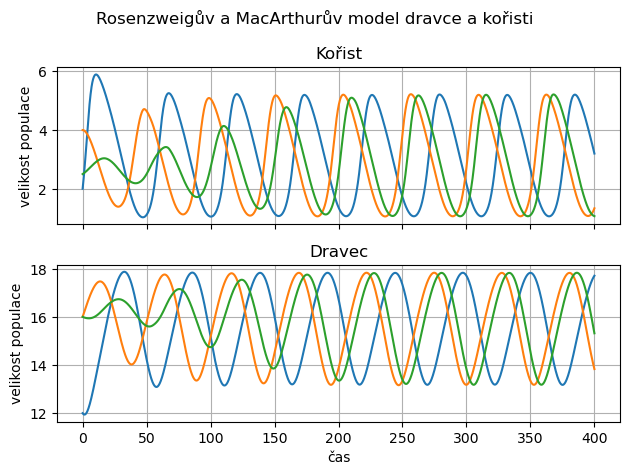

In [5]:
fig,axs = plt.subplots(2,sharex=True)
axs[0].plot(t,df.xs(key="kořist",level=1,axis=1))
axs[1].plot(t,df.xs(key="dravec",level=1,axis=1))

for ax in axs:
    ax.grid()
    ax.set(ylabel="velikost populace")
    
axs[0].set(title="Kořist")    
axs[1].set(xlabel="čas",title="Dravec")
plt.suptitle("Rosenzweigův a MacArthurův model dravce a kořisti")
plt.tight_layout();

Nedostatkem Lotkova–Volterrova modelu to, že perioda cyklů závisí na počátečních
podmínkách. Model Rosenzweigův a MacArthurův tímto nedostatkem netrpí, protože
obsahuje jenom jeden cyklus a všechny trajektorie k němu konvergují. Perioda
oscilujících řešení tedy bude stejná a řešení mohou být nanejvýš fázově
posunuta, což je vidět z časového průběhu. Jednoznačnost cyklu je
identifikovatelná z fázového portrétu.

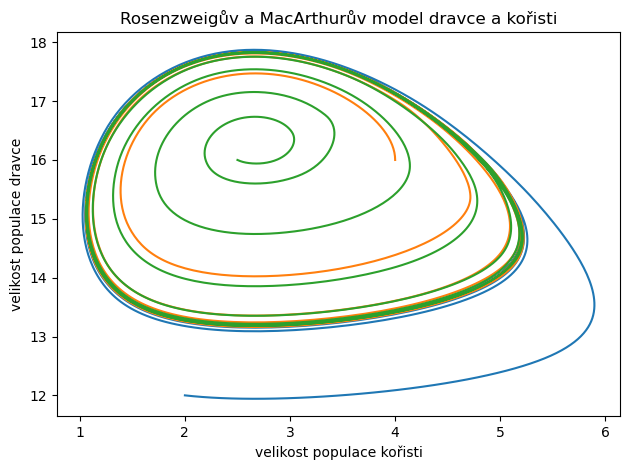

In [6]:
fig,ax = plt.subplots()
for i in range(len(pocatecni_podminky)):
    ax.plot(*df[i].values.T)

ax.set(
    xlabel="velikost populace kořisti",
    ylabel="velikost populace dravce",
    title="Rosenzweigův a MacArthurův model dravce a kořisti")    
plt.tight_layout();

Kvůli překryvu křivek je možná vhodnější použít animaci.

In [7]:
# podle https://stackoverflow.com/questions/43445103/inline-animations-in-jupyter
import matplotlib.animation
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 100  
plt.ioff()

fig,ax = plt.subplots()
korist = df.xs(key="kořist",level=1,axis=1).values
dravec = df.xs(key="dravec",level=1,axis=1).values
ax.set(
    xlabel="velikost populace kořisti",
    ylabel="velikost populace dravce",
    title="Rosenzweigův a MacArthurův model dravce a kořisti",
    xlim=(korist.min()*0.95,korist.max()*1.05),
    ylim=(dravec.min()*0.95,dravec.max()*1.05)
)  

def animate(t):
    if t==0:
        ax.set_prop_cycle(None)           # reset cyklovače barev
    ax.plot(*df[t].values.T)

matplotlib.animation.FuncAnimation(fig, animate, frames=3)

(Předchozí animace vypnula interaktivní kreslení, musíme ho zase zapnout.)

In [8]:
plt.clf()
plt.ion();

Pro detailnější informaci můžeme do obrázku zahrnout i směrové pole a nulkliny.

<Figure size 640x480 with 0 Axes>

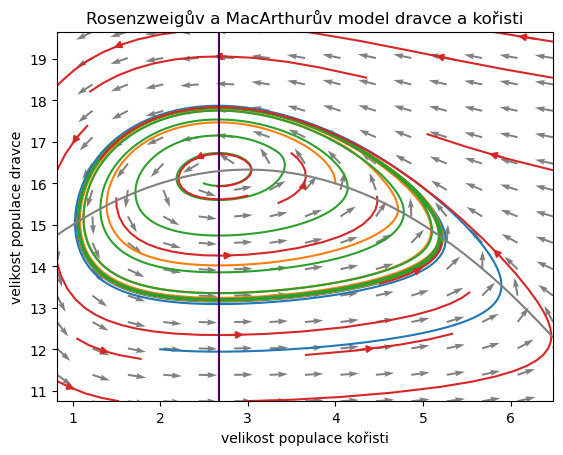

In [9]:
korist = df.xs(key="kořist",level=1,axis=1).values
dravec = df.xs(key="dravec",level=1,axis=1).values

xmin, xmax = korist.min()*0.8, korist.max()*1.1
ymin, ymax = dravec.min()*0.9, dravec.max()*1.1

x, y = np.meshgrid(np.linspace(xmin, xmax, 15), 
                   np.linspace(ymin, ymax, 15))

# Komponenty vektoroveho pole
u,v = model(0,[x,y])
M = np.sqrt(u**2+v**2) # velikost vektoru

fig,ax = plt.subplots()
for i in range(len(pocatecni_podminky)):
    ax.plot(*df[i].values.T)
    
ax.quiver(x,y,u/M,v/M,color='gray',units='xy', angles='xy') # vykresleni s jednotkovou delkou
integralni_krivky = ax.streamplot(x, y, u, v, density=0.3)

x, y = np.meshgrid(np.linspace(xmin, xmax, 40), 
                   np.linspace(ymin, ymax, 40))

x_nulcline = plt.contour(x, y, predator(x,y), [0])
y_nulcline = plt.contour(x, y, prey(x,y), [0], colors='gray')


ax.set(
    xlabel="velikost populace kořisti",
    ylabel="velikost populace dravce",
    title="Rosenzweigův a MacArthurův model dravce a kořisti",
);

Poznámka: Zkuste změnou parametru $c$ regulovat úmrtnost dravce. Všimněte si, že
se model může stabilizovat, tj. nemusí docházet k oscilacím, ale populace mohou
setrvávat na rovnovážné poloze. I toto v přírodě pozorujeme, že stavy dravce a
kořisti (nebo býložravce a rostliny) jsou dlouhodobě stabilní.